<a href="https://colab.research.google.com/github/ValentineKarimi/Week-4-Core-Independent-project-/blob/master/Wee4_Independent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Importing Libraries

In [2060]:
# Importing the Pandas Library
#
import pandas as pd

# Importing the Numpy Library
#
import numpy as np

#Import plots 
#
import matplotlib.pyplot as plt
import seaborn as sns

#Import stats libraries
# 

# Reading the data

In [2061]:
#loading the database
with open('/content/autolib_daily_events_postal_code.csv', 'r') as f:
     df = pd.read_csv(f, header=0)
df.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [2062]:
#Knowing how many records and columns are there 
df.shape

(16085, 13)

In [2063]:
#Getting more information on data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [2064]:
#Drop the columns irrelevant to our analysis  
to_drop = ['Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','n_daily_data_points']
df.drop(to_drop, axis=1,inplace=True)

In [2065]:
#Finding any null values
df.isnull()
df.isnull().any()
df.isnull().sum()

Postal code              0
date                     0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

In [2066]:
#Standardization - Fixing messy column names-  All columns will be in lowercase and will avoid any white spaces on the columns 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.tail(3)

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
16082,95880,6/17/2018,6,weekend,33,35,0,0
16083,95880,6/18/2018,0,weekday,11,14,0,0
16084,95880,6/19/2018,1,weekday,2,2,0,0


In [2067]:
#SET THE date_time as the index

import datetime 
from datetime import  datetime
df.date.sort_values(ascending=True)
df.set_index(pd.DatetimeIndex(df['date']), drop=True, inplace = True)
df.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,
2018-01-01,75001,1/1/2018,0,weekday,110,103,22,20
2018-01-02,75001,1/2/2018,1,weekday,98,94,23,22
2018-01-03,75001,1/3/2018,2,weekday,138,139,27,27
2018-01-04,75001,1/4/2018,3,weekday,104,104,25,21
2018-01-05,75001,1/5/2018,4,weekday,114,117,18,20


In [2068]:
#Change the postal code 
convert_dict = {'postal_code': str
               } 
  
df= df.astype(convert_dict) 

#Central tendency 

In [2069]:
df.mean()

postal_code                     inf
dayofweek                  2.969599
bluecars_taken_sum       125.926951
bluecars_returned_sum    125.912714
slots_freed_sum           22.629033
slots_taken_sum           22.629282
dtype: float64

In [2070]:
df.mode()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/24/2018,0.0,weekday,12.0,13.0,0.0,0.0
1,75002,1/25/2018,NaN,NaN,NaN,NaN,NaN,NaN
2,75003,1/27/2018,NaN,NaN,NaN,NaN,NaN,NaN
3,75004,1/28/2018,NaN,NaN,NaN,NaN,NaN,NaN
4,75005,1/29/2018,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
84,94700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,94800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,95100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,95870,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2071]:
df.std()

dayofweek                  2.008378
bluecars_taken_sum       185.426579
bluecars_returned_sum    185.501535
slots_freed_sum           52.120263
slots_taken_sum           52.146030
dtype: float64

In [2072]:
df.skew()

postal_code             -1.168778
dayofweek                0.018824
bluecars_taken_sum       2.406355
bluecars_returned_sum    2.412085
slots_freed_sum          2.597406
slots_taken_sum          2.596904
dtype: float64

In [2073]:
df.var()

dayofweek                    4.033582
bluecars_taken_sum       34383.016113
bluecars_returned_sum    34410.819414
slots_freed_sum           2716.521850
slots_taken_sum           2719.208431
dtype: float64

# Outliers and Anomalies 

Detecting outliers 

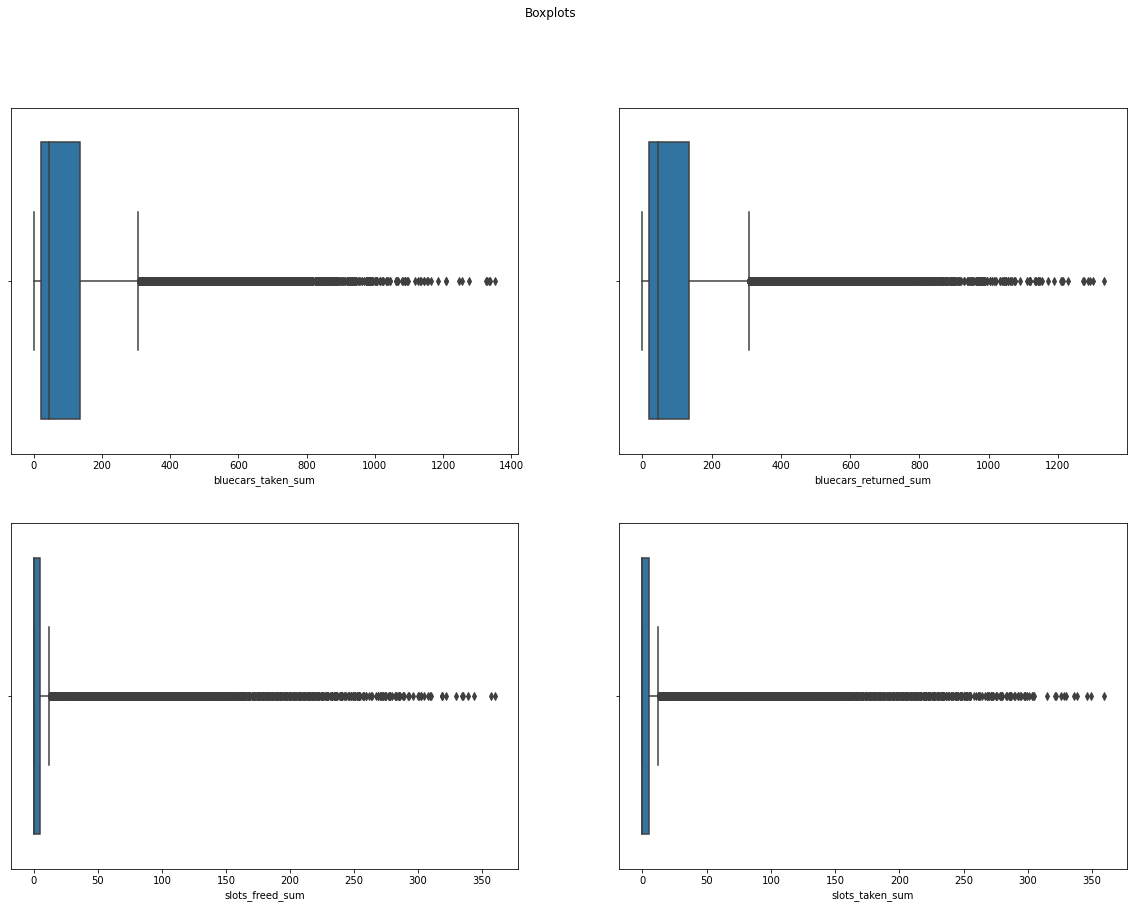

In [2074]:
# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 14))
fig.suptitle('Boxplots')
sns.boxplot(df['bluecars_taken_sum'], ax=ax1)
sns.boxplot(df['bluecars_returned_sum'], ax=ax2)
sns.boxplot(df['slots_freed_sum'], ax=ax3)
sns.boxplot(df['slots_taken_sum'], ax=ax4)

plt.show()

The data has so many outliers especially to the right. If we remove the outliers we might interfere with the validity of the data. 

Checking for Anomalies

In [2075]:
# Calculating our first, third quantiles and then later our IQR

#
Q1= df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
print(Q1)
print('----------------------------------------')
print(Q3)
print('----------------------------------------')
print(IQR)

dayofweek                 1.0
bluecars_taken_sum       20.0
bluecars_returned_sum    20.0
slots_freed_sum           0.0
slots_taken_sum           0.0
Name: 0.25, dtype: float64
----------------------------------------
dayofweek                  5.0
bluecars_taken_sum       135.0
bluecars_returned_sum    135.0
slots_freed_sum            5.0
slots_taken_sum            5.0
Name: 0.75, dtype: float64
----------------------------------------
dayofweek                  4.0
bluecars_taken_sum       115.0
bluecars_returned_sum    115.0
slots_freed_sum            5.0
slots_taken_sum            5.0
dtype: float64


There are no extreme anomalies. I can proceed with analysis. 

# Univariate and Bivariate Analysis 

**Univariate Analysis**

In [2076]:
GB=df.groupby([df.index.month]).sum()
GB

GB.rename(index={1: '2018/01', 2: '2018/02', 3: '2018/03', 4: '2018/04', 5: '2018/06', 6: '2018/06'})


,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,
2018/01,8972,403174,403301,69310,69272
2018/02,7918,309708,309449,56887,56902
2018/03,9869,405231,405480,74558,74525
2018/04,9285,385103,384811,68685,68772
2018/06,5720,264814,264499,48068,48002
2018/06,6002,257505,257766,46480,46519


Bluecars taken 

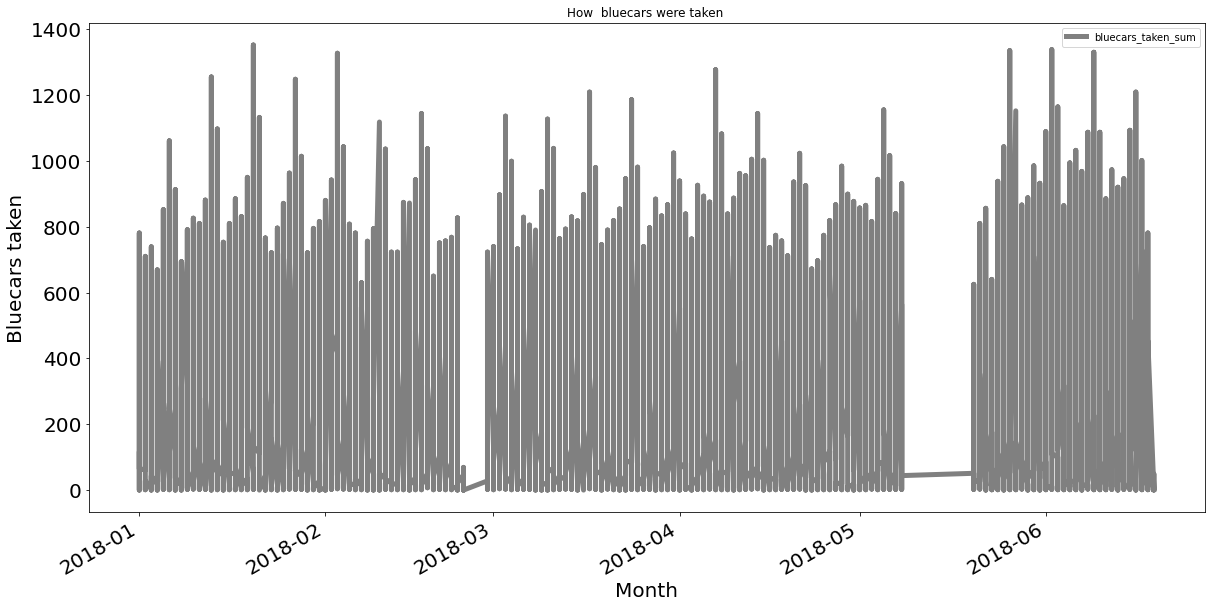

In [2077]:
df[['bluecars_taken_sum']].plot(figsize=(20,10), linewidth=5, fontsize=20, color='grey')
plt.xlabel("Month", fontsize=20)
plt.ylabel("Bluecars taken", fontsize=20)
plt.title("How  bluecars were taken ")
plt.show()

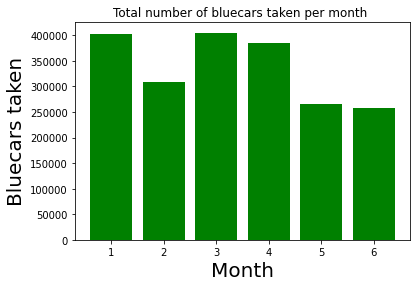

In [2078]:
#GB.plot(kind='bar',x= 'date', y='bluecars_taken_sum' ,figsize=(20,10), linewidth=5, fontsize=20)
#plt.bar(languages, performance, color='yellow')
plt.bar(GB.index, GB.bluecars_taken_sum , color='green')
plt.xlabel("Month", fontsize=20)
plt.ylabel("Bluecars taken", fontsize=20)
plt.title("Total number of bluecars taken per month ")
plt.show()


Bluecars returned

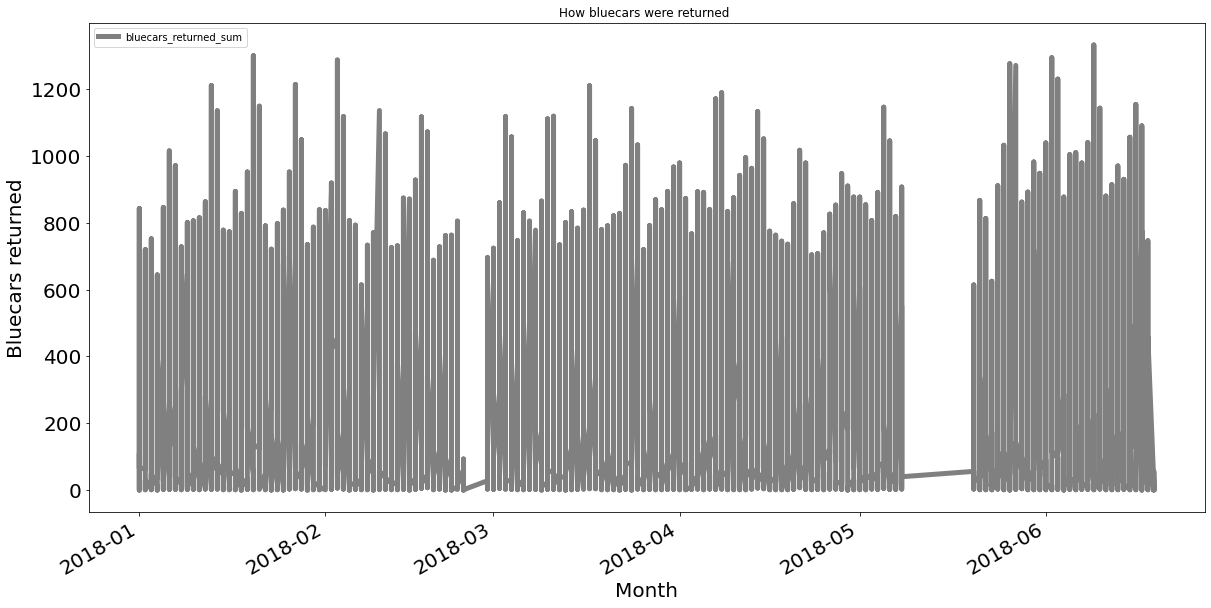

In [2079]:
df[['bluecars_returned_sum']].plot(figsize=(20,10), linewidth=5, fontsize=20, color='grey')
plt.xlabel("Month", fontsize=20)
plt.ylabel("Bluecars returned", fontsize=20)
plt.title("How bluecars were returned ")
plt.show()

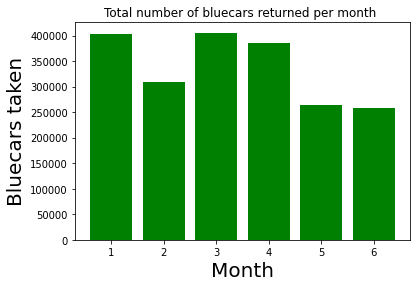

In [2080]:
#GB.plot(kind='bar',x= 'date', y='bluecars_taken_sum' ,figsize=(20,10), linewidth=5, fontsize=20)
#plt.bar(languages, performance, color='yellow')
plt.bar(GB.index, GB.bluecars_returned_sum,  color='green')
plt.xlabel("Month", fontsize=20)
plt.ylabel("Bluecars taken", fontsize=20)
plt.title("Total number of bluecars returned per month ")
plt.show()

Slots freed

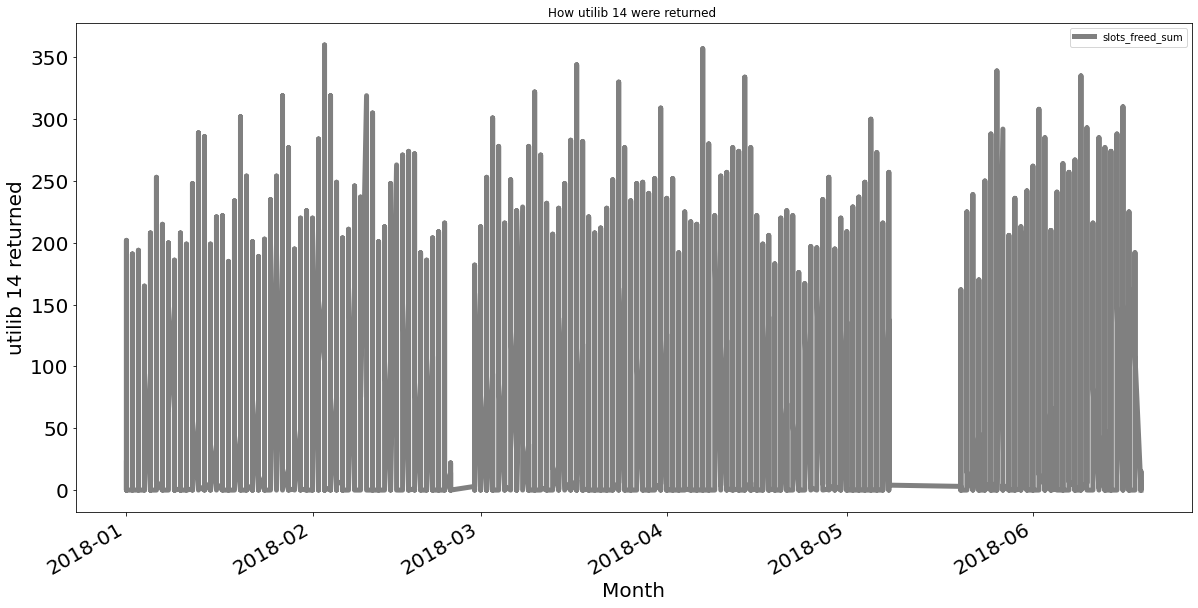

In [2081]:
df[['slots_freed_sum']].plot(figsize=(20,10), linewidth=5, fontsize=20, color='grey')
plt.xlabel("Month", fontsize=20)
plt.ylabel("utilib 14 returned", fontsize=20)
plt.title("How utilib 14 were returned ")
plt.show()

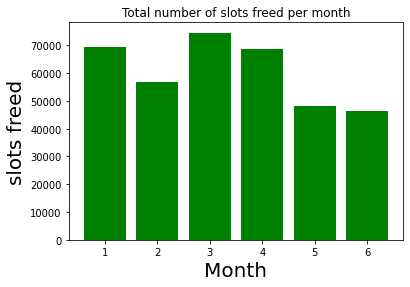

In [2082]:
plt.bar(GB.index, GB.slots_freed_sum , color='green')
plt.xlabel("Month", fontsize=20)
plt.ylabel("slots freed", fontsize=20)
plt.title("Total number of slots freed per month")
plt.show()

Slots taken 

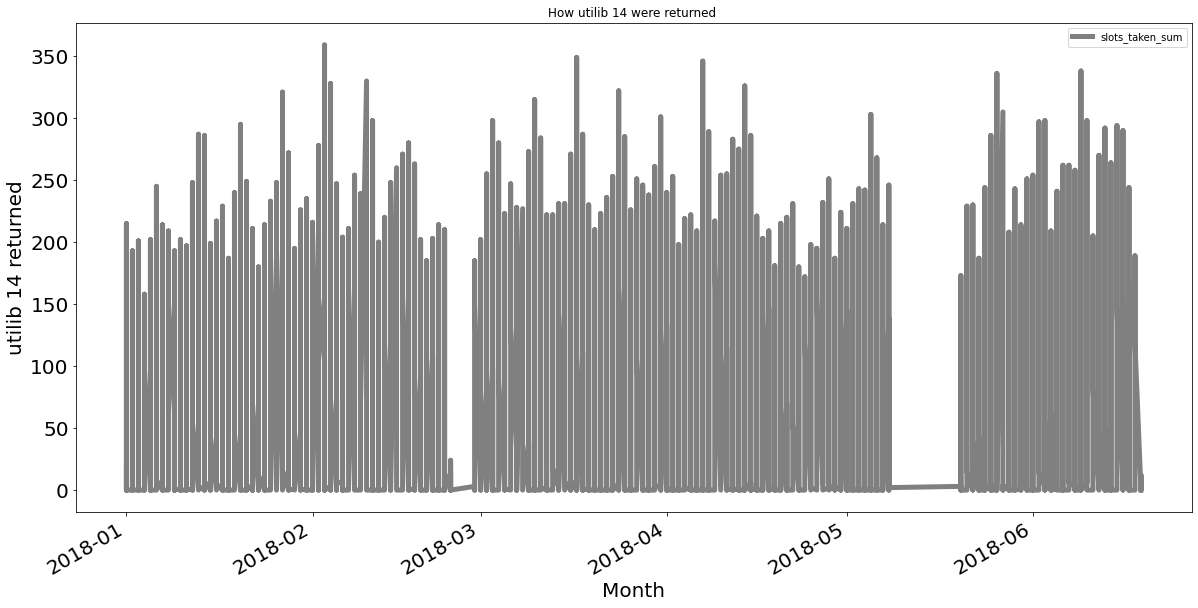

In [2083]:
df[['slots_taken_sum']].plot(figsize=(20,10), linewidth=5, fontsize=20, color='grey')
plt.xlabel("Month", fontsize=20)
plt.ylabel("utilib 14 returned", fontsize=20)
plt.title("How utilib 14 were returned ")
plt.show()

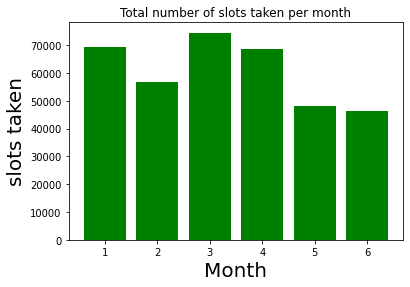

In [2084]:
plt.bar(GB.index, GB.slots_taken_sum , color='green')
plt.xlabel("Month", fontsize=20)
plt.ylabel("slots taken", fontsize=20)
plt.title("Total number of slots taken per month")
plt.show()

Our univariate analysis shows that more cars were picked and returned on March and April and that May and June had almost the same  number of cars being picked and returned 

**Bivariate Analysis**

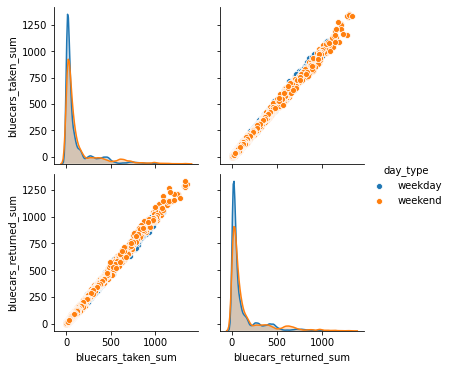

In [2085]:
# Ploting the bivariate summaries and recording our observations
g = sns.pairplot(df, diag_kind="kde", hue="day_type",vars=["bluecars_taken_sum", "bluecars_returned_sum"])
plt.show()

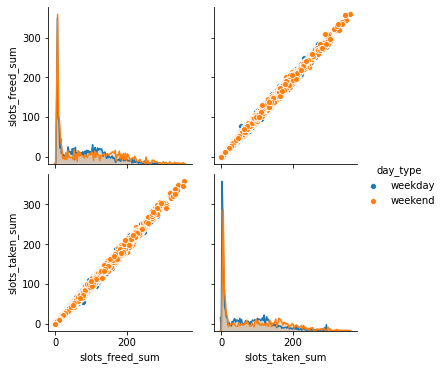

In [2086]:
# Ploting the bivariate summaries and recording our observations
i = sns.pairplot(df, diag_kind="kde", hue="day_type",vars=["slots_freed_sum", "slots_taken_sum"])
plt.show()

In [2087]:
bluecars = df[['bluecars_returned_sum', 'bluecars_taken_sum']]

In [2088]:
np.random.seed(15) 
sample = np.random.normal(loc=bluecar_mean, scale=1.0, size=310)

In [2089]:
bluecars = df[['bluecars_returned_sum', 'bluecars_taken_sum']]

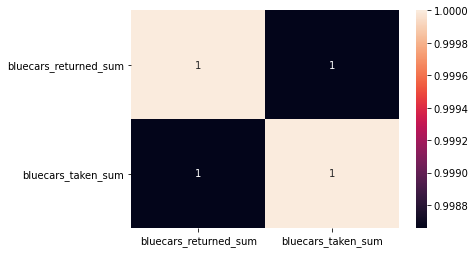

In [2090]:
#Heat map on respondent Age and household size
sns.heatmap(bluecars.corr(),annot=True)
plt.show()

In [2091]:
slots = df[["slots_freed_sum", "slots_taken_sum"]]


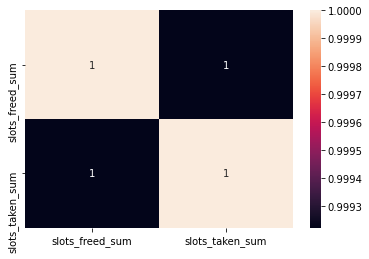

In [2092]:
#Heat map on respondent Age and household size
sns.heatmap(slots.corr(),annot=True)
plt.show()

Our bivariate analysis shows that the more blue cars are returned the more they are taken. So there is a positive correlation between cars taken and returned 

Also, their is a positive correlation between slots freed and slots taken.




# Sampling Techniques 

In [2093]:
# Importing scipy.stats
import scipy.stats as stats



# Calculating the sample mean of final data
#
sample_mean = df.mean()
print(sample_mean)


# Finding the sample size
#
sample_size = len(df)
print(sample_size)

# Finding the standard error of the mean of data 
#
std_error = df.std() / np.sqrt(sample_size)
print(std_error)

# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  
# 
#stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

postal_code                     inf
dayofweek                  2.969599
bluecars_taken_sum       125.926951
bluecars_returned_sum    125.912714
slots_freed_sum           22.629033
slots_taken_sum           22.629282
dtype: float64
16085
dayofweek                0.015836
bluecars_taken_sum       1.462047
bluecars_returned_sum    1.462638
slots_freed_sum          0.410957
slots_taken_sum          0.411160
dtype: float64


Stratified sample

In [2094]:
days= df.groupby(['day_type','postal_code']).apply(lambda y: y.sample(frac=0.1))


# proportion of the non_stratified sample
print(days['day_type'].value_counts())
print(days['postal_code'].value_counts())


weekday    1135
weekend     414
Name: day_type, dtype: int64
92410    15
92220    15
92300    15
95870    15
92110    15
         ..
75008    15
92340    14
93370    14
93200    13
93390     8
Name: postal_code, Length: 104, dtype: int64


In [2095]:
days.head()

postal_code  ... slots_taken_sum
day_type postal_code date                    ...                
weekday  75001       2018-06-01       75001  ...              22
                     2018-06-18       75001  ...              22
                     2018-03-16       75001  ...              40
                     2018-03-22       75001  ...              24
                     2018-01-04       75001  ...              21

[5 rows x 8 columns]

Random sampling 

In [2096]:
cols = ['postal_code', 'date','day_type', 'bluecars_taken_sum']
bluecarstaken= days[cols]
bluecarstaken

postal_code  ... bluecars_taken_sum
day_type postal_code date                    ...                   
weekday  75001       2018-06-01       75001  ...                116
                     2018-06-18       75001  ...                122
                     2018-03-16       75001  ...                145
                     2018-03-22       75001  ...                143
                     2018-01-04       75001  ...                104
...                                     ...  ...                ...
weekend  95870       2018-05-26       95870  ...                 16
         95880       2018-01-07       95880  ...                 28
                     2018-06-09       95880  ...                 15
                     2018-04-01       95880  ...                 49
                     2018-01-20       95880  ...                 25

[1549 rows x 4 columns]

In [2097]:
# Importing scipy.stats
import scipy.stats as stats


# Calculating the sample mean of final data
#
sample_mean = bluecarstaken['bluecars_taken_sum'].mean()
sample_mean

# Finding the sample size
#
sample_size = bluecarstaken['bluecars_taken_sum'].shape[0]
sample_size

# Finding the standard error of the mean of data 
#
std_error = bluecarstaken['bluecars_taken_sum'].std() / np.sqrt(sample_size)
std_error

# Calculating the 95% Confidence Interval for mean data 
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

(116.88592316893423, 135.36456101440987)

In [2098]:

#bluecarstaken.loc[bluecarstaken['bluecars_taken_sum'] == sample]
bluecars_sample= bluecarstaken.loc[(bluecarstaken['bluecars_taken_sum']> 116.88592316893423) &(bluecarstaken['bluecars_taken_sum']< 135.36456101440987)]
bluecars_sample

postal_code  ... bluecars_taken_sum
day_type postal_code date                    ...                   
weekday  75001       2018-06-18       75001  ...                122
                     2018-03-09       75001  ...                135
                     2018-03-06       75001  ...                122
                     2018-03-01       75001  ...                127
         75002       2018-04-19       75002  ...                131
         92000       2018-03-26       92000  ...                120
         92150       2018-05-01       92150  ...                123
         92240       2018-01-29       92240  ...                126
         92300       2018-03-12       92300  ...                123
                     2018-04-16       92300  ...                134
                     2018-01-17       92300  ...                130
         92400       2018-05-24       92400  ...                119
         92500       2018-03-14       92500  ...                122
                     2018-04-17       92500  ...                119
                     2018-04-04       92500  ...                126
                     2018-03-28       92500  ...                118
                     2018-03-23       92500  ...                135
                     2018-04-11       92500  ...                118
         92600       2018-02-21       92600  ...                123
                     2018-04-12       92600  ...                131
         92700       2018-05-21       92700  ...                122
                     2018-04-20       92700  ...                127
                     2018-06-12       92700  ...                123
         93100       2018-05-25       93100  ...                131
                     2018-03-16       93100  ...                128
                     2018-06-11       93100  ...                120
                     2018-02-15       93100  ...                118
         93400       2018-05-02       93400  ...                126
weekend  92000       2018-04-29       92000  ...                120
         92150       2018-03-04       92150  ...                117
                     2018-03-31       92150  ...                126
         92210       2018-03-10       92210  ...                120
         92400       2018-05-06       92400  ...                134
                     2018-04-14       92400  ...                129
         92800       2018-05-26       92800  ...                130
         94300       2018-05-26       94300  ...                127
         94800       2018-04-07       94800  ...                123

[37 rows x 4 columns]

# Checking consistency of data 

In [2099]:
bluecars_sample.describe()

,bluecars_taken_sum
count,37.000000
mean,125.000000
std,5.270463
min,117.000000
25%,120.000000
50%,123.000000
75%,129.000000
max,135.000000


In [2100]:
#Descriptive statistics 
df.describe()


,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,2.969599,125.926951,125.912714,22.629033,22.629282
std,2.008378,185.426579,185.501535,52.120263,52.146030
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,20.000000,0.000000,0.000000
50%,3.000000,46.000000,46.000000,0.000000,0.000000
75%,5.000000,135.000000,135.000000,5.000000,5.000000
max,6.000000,1352.000000,1332.000000,360.000000,359.000000


In [2119]:
#Point estimation 
df['bluecars_taken_sum'].mean() - bluecars_sample['bluecars_taken_sum'].mean()

0.926950575069938

# Normality Test 

In [2101]:
# imporing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(bluecars_sample['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.943, p=0.058
Sample looks Gaussian


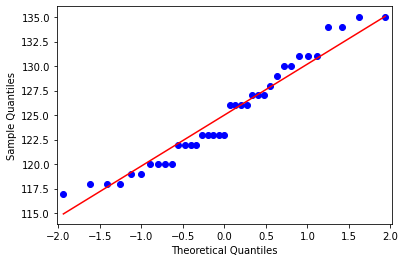

In [2102]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(bluecars_sample['bluecars_taken_sum'], line='s')
pyplot.show()

# Hypothesis Testing 

In [2103]:
bluecars_sample.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 37 entries, ('weekday', '75001', Timestamp('2018-06-18 00:00:00')) to ('weekend', '94800', Timestamp('2018-04-07 00:00:00'))
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   postal_code         37 non-null     object
 1   date                37 non-null     object
 2   day_type            37 non-null     object
 3   bluecars_taken_sum  37 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 3.6+ KB


In [2104]:
convert_dict = {'postal_code': int}
  
bluecars_sample= bluecars_sample.astype(convert_dict) 

In [2105]:
op = bluecars_sample.loc[ (bluecars_sample['day_type'] == 'weekday')& (bluecars_sample['postal_code'] < 75008) ]
op.date.sort_values(ascending=True)
op

postal_code  ... bluecars_taken_sum
day_type postal_code date                     ...                   
weekday  75001       2018-06-18        75001  ...                122
                     2018-03-09        75001  ...                135
                     2018-03-06        75001  ...                122
                     2018-03-01        75001  ...                127
         75002       2018-04-19        75002  ...                131

[5 rows x 4 columns]

In [2106]:
op1 = bluecars_sample.loc[ (bluecars_sample['day_type'] == 'weekday')& (bluecars_sample['postal_code'] > 92000) ]
op1.date.sort_values(ascending=True)
op1

postal_code  ... bluecars_taken_sum
day_type postal_code date                     ...                   
weekday  92150       2018-05-01        92150  ...                123
         92240       2018-01-29        92240  ...                126
         92300       2018-03-12        92300  ...                123
                     2018-04-16        92300  ...                134
                     2018-01-17        92300  ...                130
         92400       2018-05-24        92400  ...                119
         92500       2018-03-14        92500  ...                122
                     2018-04-17        92500  ...                119
                     2018-04-04        92500  ...                126
                     2018-03-28        92500  ...                118
                     2018-03-23        92500  ...                135
                     2018-04-11        92500  ...                118
         92600       2018-02-21        92600  ...                123
                     2018-04-12        92600  ...                131
         92700       2018-05-21        92700  ...                122
                     2018-04-20        92700  ...                127
                     2018-06-12        92700  ...                123
         93100       2018-05-25        93100  ...                131
                     2018-03-16        93100  ...                128
                     2018-06-11        93100  ...                120
                     2018-02-15        93100  ...                118
         93400       2018-05-02        93400  ...                126

[22 rows x 4 columns]

In [2107]:
print(len(op))

5


In [2108]:
print(len(op1))

22


Confirming t test assumptions 

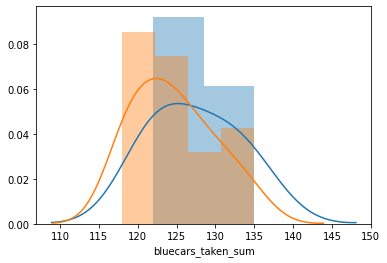

In [2109]:
sns.distplot(op.bluecars_taken_sum)
sns.distplot(op1.bluecars_taken_sum)

In [2110]:
from scipy.stats import skew 
import numpy as np  
import pylab as p  
  
print( '\nSkewness for data : ', skew(op.bluecars_taken_sum)) 
print( '\nSkewness for data : ', skew(op1.bluecars_taken_sum)) 


Skewness for data :  0.2598196982898982

Skewness for data :  0.4401177181822796


In [2111]:
convert_dict = {'postal_code': str}
  
op= op.astype(convert_dict) 
op1= op1.astype(convert_dict) 


In [2112]:
op.describe()

,bluecars_taken_sum
count,5.000000
mean,127.400000
std,5.683309
min,122.000000
25%,122.000000
50%,127.000000
75%,131.000000
max,135.000000


In [2113]:
op1.describe()

,bluecars_taken_sum
count,22.000000
mean,124.636364
std,5.205724
min,118.000000
25%,120.500000
50%,123.000000
75%,127.750000
max,135.000000


Hypothesis testing 

µ1 = Mean of Central Paris


 µ2 = Mean of outer parts of Paris 

Null H0 : µ1 =< µ2 


Alternative Ha:  µ1 > µ2 (claim)


The alpha level for this experiment will be 0.05 

In [2114]:
#Independent two sample t-test 

stat,p_value=stats.ttest_ind(a=op.bluecars_taken_sum,b=op1.bluecars_taken_sum,equal_var=False)

In [2121]:
print(stat)
print(p_value)

0.9964762427078805
0.35988631540138777


In [2116]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


In [2117]:
#Compute the descriptive statistics of op and op1.
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
abar = op.bluecars_taken_sum.mean()
avar = op.bluecars_taken_sum.var(ddof=1)
na = op.size
adof = na - 1

bbar =op1.bluecars_taken_sum.mean()
bvar = op1.bluecars_taken_sum.var(ddof=1)
nb = op1.size
bdof = nb - 1

# Using formulas directly.
tf =(abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))


formula:              t = 1.99295  p = 0.0565694


In [2118]:
#degrees of freedom =
dof = adof + bdof
dof

106

T critical at 0.05 confidence interval and degree of freedom of 106 is 1.6593


T stat > T critical 


If the t-value is greater than the critical value, you  reject the null hypothesis.